In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting Seaborn style for visualizations
sns.set(style="whitegrid")


In [4]:
df = pd.read_excel('../data/Coffee Shop Sales.xlsx')
# Display the first few rows of the dataframe
print(df.head())

# Summary statistics for numerical columns
print(df.describe())

# Information about dataframe (column data types, non-null counts)
print(df.info())


   transaction_id transaction_date transaction_time  transaction_qty  \
0               1       2023-01-01         07:06:11                2   
1               2       2023-01-01         07:08:56                2   
2               3       2023-01-01         07:14:04                2   
3               4       2023-01-01         07:20:24                1   
4               5       2023-01-01         07:22:41                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  Lower Manhattan          32         3.0              Coffee   
1         5  Lower Manhattan          57         3.1                 Tea   
2         5  Lower Manhattan          59         4.5  Drinking Chocolate   
3         5  Lower Manhattan          22         2.0              Coffee   
4         5  Lower Manhattan          57         3.1                 Tea   

            product_type               product_detail  
0  Gourmet brewed coffee                  Ethiopia Rg 

In [5]:
# Check for missing values
print(df.isnull().sum())

# Depending on the context, you might fill missing values or drop them
# For example, to fill missing values with the mean: df['column_name'].fillna(df['column_name'].mean(), inplace=True)


transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64


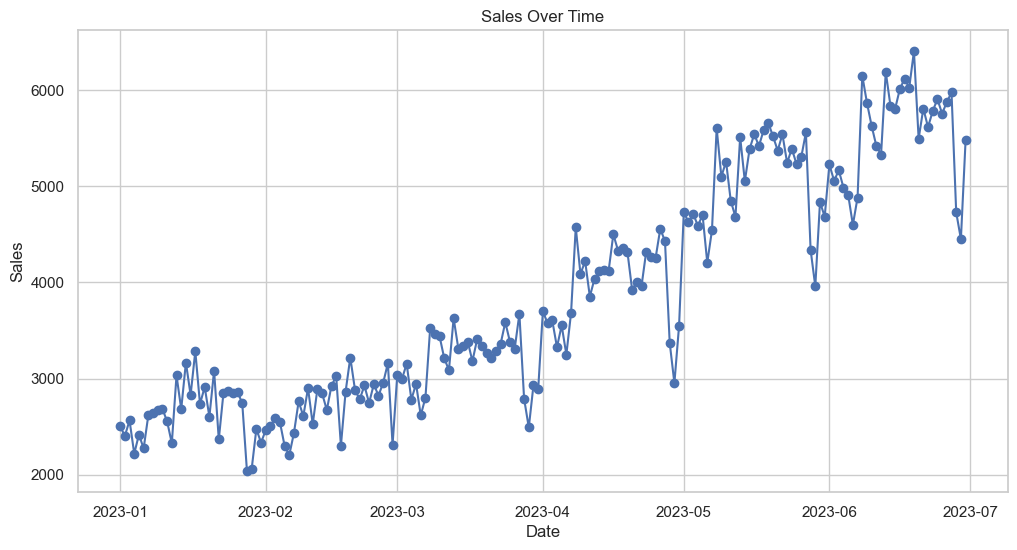

In [9]:
# Ensure the transaction_date column is in datetime format
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Calculate sales if needed (assuming sales = transaction_qty * unit_price)
df['sales'] = df['transaction_qty'] * df['unit_price']

# Aggregate sales by transaction_date
daily_sales = df.groupby('transaction_date')['sales'].sum().reset_index()

# Plotting sales over time
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['transaction_date'], daily_sales['sales'], marker='o', linestyle='-')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

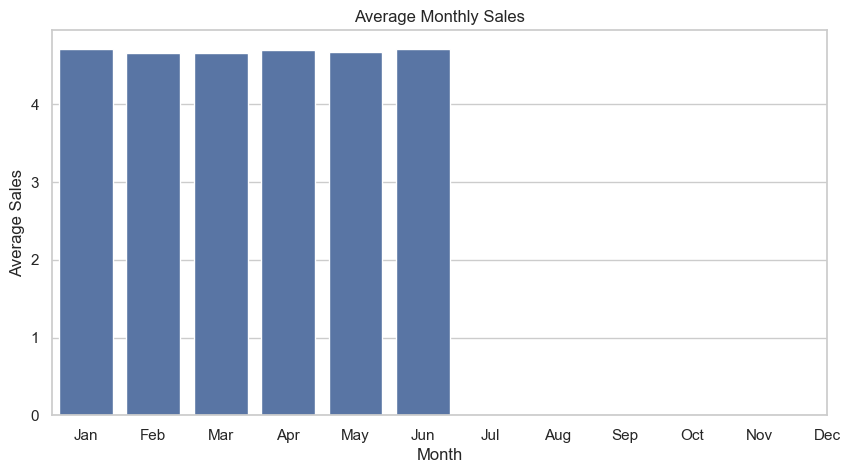

In [11]:

# Extract month from the transaction_date for grouping
df['month'] = df['transaction_date'].dt.month

# Calculate average monthly sales
monthly_sales = df.groupby('month')['sales'].mean().reset_index()

# Plotting average monthly sales
plt.figure(figsize=(10, 5))
sns.barplot(x='month', y='sales', data=monthly_sales)
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

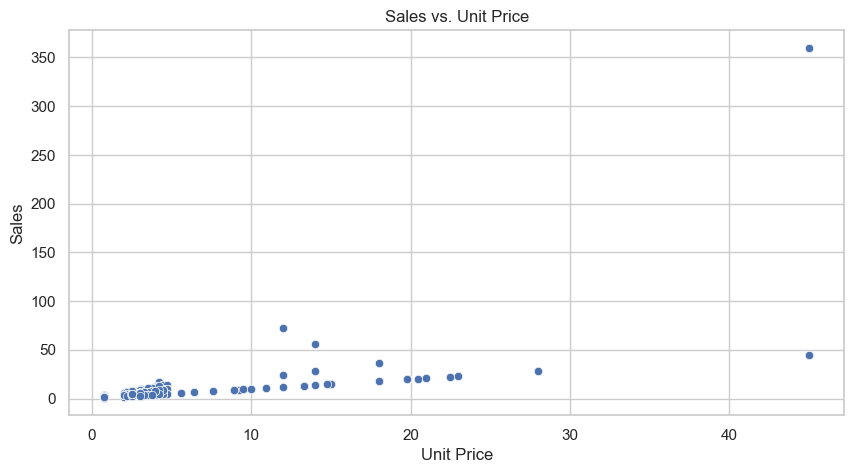

In [12]:
# Scatter plot of unit_price vs. sales
plt.figure(figsize=(10, 5))
sns.scatterplot(x='unit_price', y='sales', data=df)
plt.title('Sales vs. Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Sales')
plt.show()

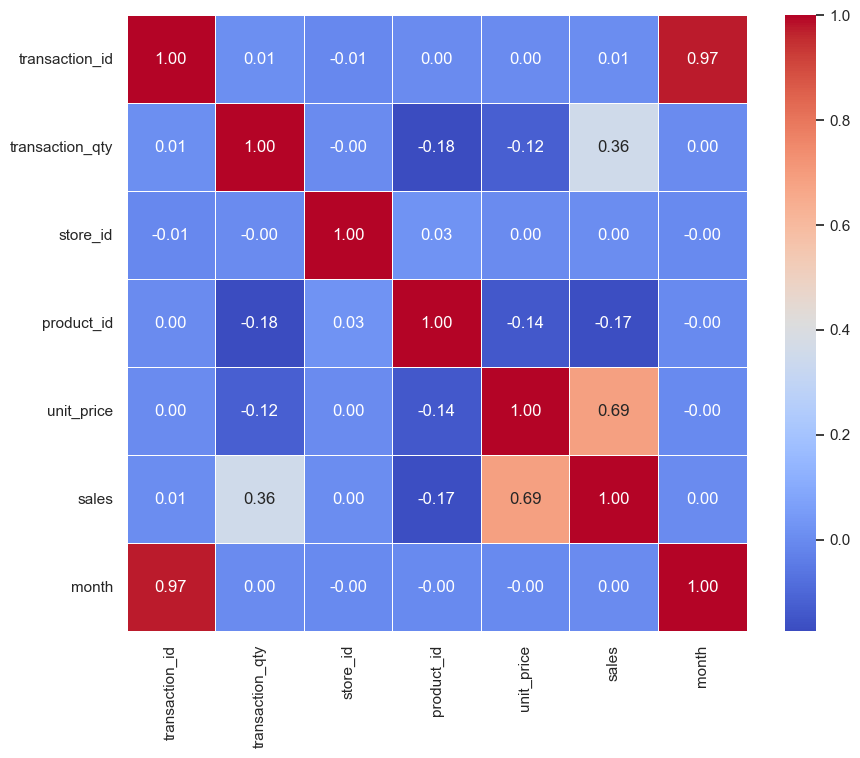

In [16]:
import numpy as np

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix on numeric columns only
correlation_matrix = numeric_df.corr()

# Generate a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.show()